# Setup do projeto

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

RANDOM_STATE = 45

# Carga de Dados


In [2]:
cabecalho = ['age', 'sex', 'chest_pain_type', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
HeartDisease = pd.read_csv('../datasets/processed.cleveland.data',names=cabecalho)

In [3]:
HeartDisease.head()

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
print('Dimensões do dataset: ', HeartDisease.shape)
HeartDisease.describe()

Dimensões do dataset:  (303, 14)


,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   sex              303 non-null    float64
 2   chest_pain_type  303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               303 non-null    object 
 12  thal             303 non-null    object 
 13  num              303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# Preparação dos dados

In [6]:
HeartDisease_nao_rotulado = pd.get_dummies(HeartDisease.iloc[:, :-1])
HeartDisease_nao_rotulado

,age,sex,chest_pain_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,1,0,0,0,0,0,1,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,0,0,0,1,0,1,0,0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,0,0,1,0,0,0,0,1,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,1,0,0,0,0,1,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,1,0,0,0,0,0,0,1,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,0,0,1,0,0,0,0,1,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,0,1,0,0,0,0,0,1,0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,0,1,0,0,0,1,0,0,0


# Agrupamento

In [7]:
model = KMeans(n_clusters=3)
model.fit(HeartDisease_nao_rotulado)
grupos = model.predict(HeartDisease_nao_rotulado)
print(grupos)

[0 0 0 0 2 0 0 1 0 2 2 1 0 0 2 2 0 0 0 0 2 0 0 2 2 2 1 0 0 2 0 0 1 0 0 2 2
 0 1 0 0 2 1 2 1 0 2 0 1 2 2 2 1 2 0 0 0 2 0 2 1 2 2 1 2 0 2 0 1 0 0 0 0 0
 2 1 0 1 0 0 2 0 1 0 1 0 0 2 0 0 1 2 0 2 0 0 0 0 2 2 0 2 1 0 2 1 2 0 0 2 1
 0 2 1 0 2 2 2 1 0 0 1 2 2 0 0 1 0 2 2 0 2 2 0 2 0 2 0 2 0 2 1 2 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 2 1 2 0 0 2 2 1 0 2 0 0 0 1 2 0 0 2 1 0 0 1 0 0 1
 2 0 0 1 0 2 1 0 1 2 1 0 0 0 0 0 1 2 1 2 1 0 2 0 0 2 0 2 0 0 2 2 0 1 0 0 0
 2 0 0 2 2 0 2 2 2 1 2 0 2 0 0 0 0 1 0 1 0 0 2 0 0 0 2 2 2 2 0 1 1 2 2 2 0
 0 0 1 0 2 2 1 2 2 2 2 2 0 1 2 2 0 0 2 0 2 1 0 2 2 2 1 0 2 2 0 2 1 2 2 2 2
 2 0 0 2 2 0 2]


In [8]:
model2 = KMeans(n_clusters=8)
model2.fit(HeartDisease_nao_rotulado)
grupos2 = model2.predict(HeartDisease_nao_rotulado)
print(grupos2)

[1 7 2 1 4 1 1 3 1 4 2 3 1 1 4 6 4 1 7 1 2 0 3 4 2 4 3 2 1 6 1 1 3 1 1 4 6
 7 3 1 2 4 0 4 3 1 6 7 5 4 4 6 3 4 1 7 1 6 1 2 3 6 2 3 2 0 6 1 0 1 0 1 7 1
 4 3 1 3 1 7 4 1 3 0 3 1 1 2 1 1 3 6 1 6 1 1 1 1 4 4 1 4 3 7 6 3 6 1 1 2 3
 1 4 3 7 2 4 4 3 7 1 5 4 2 0 1 0 7 4 4 1 4 4 1 4 1 6 7 2 1 4 0 4 3 1 1 0 1
 3 3 0 7 5 0 7 3 3 3 3 1 4 3 4 7 1 4 4 3 3 6 7 2 0 5 2 7 1 2 3 1 1 5 1 0 0
 4 1 7 0 1 4 3 1 7 2 3 2 1 1 0 1 0 6 3 4 3 7 2 1 1 4 4 4 1 1 4 4 1 3 1 1 1
 4 7 1 4 2 0 2 2 4 0 6 7 4 7 7 1 1 3 1 3 1 1 2 7 1 7 4 2 2 2 7 3 3 4 2 2 1
 1 1 3 1 4 6 3 4 2 4 6 2 2 3 6 4 1 0 4 1 2 3 1 2 4 4 3 2 2 4 1 2 3 6 6 2 6
 2 7 7 2 6 1 6]


# Visualização

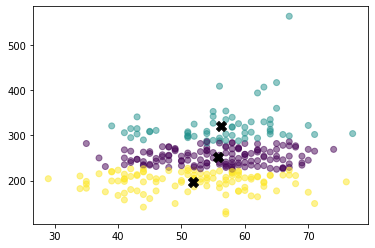

In [9]:
#clusters=3
xs = HeartDisease.iloc[:, 0]
ys = HeartDisease.iloc[:, 4]
centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 4]

_=plt.scatter(xs, ys, c=grupos, alpha=.5)
_=plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=100)

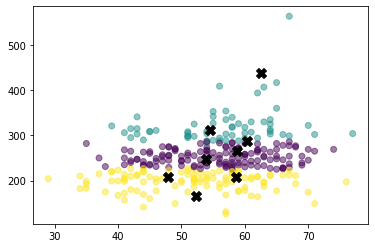

In [10]:
#clusters=8
xs = HeartDisease.iloc[:, 0]
ys = HeartDisease.iloc[:, 4]
centroids = model2.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 4]

_=plt.scatter(xs, ys, c=grupos, alpha=.5)
_=plt.scatter(centroids_x, centroids_y, c='black', marker='X', s=100)

# Avaliacao

In [11]:
df = pd.DataFrame({'grupos': grupos, 'num': HeartDisease['num']})
ct = pd.crosstab(df['grupos'], df['num'])
print(ct)

num      0   1   2   3  4
grupos                   
0       67  31  16  15  4
1       28  10  11   7  5
2       69  14   9  13  4


In [12]:
ks = range(1, 10)
inercias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(HeartDisease_nao_rotulado)
    inercias.append(model.inertia_)

([<matplotlib.axis.XTick at 0x202c9207700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

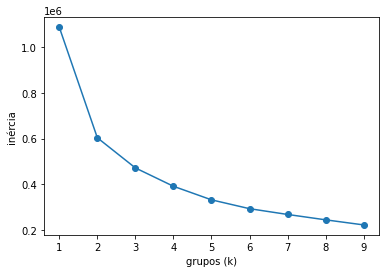

In [13]:
_=plt.plot(ks, inercias, '-o')
plt.xlabel('grupos (k)')
plt.ylabel('inércia')
plt.xticks(ks)

In [16]:
# DBSCAN
X = pd.get_dummies(HeartDisease_nao_rotulado)
db = DBSCAN(eps=9.7, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('clusters estimados: %d' % no_clusters)
print('pontos estimados: %d' % no_noise)

clusters estimados: 28
pontos estimados: 218
